<a href="https://colab.research.google.com/github/imharshmishra87/Feature-Scaling-Ml/blob/main/Outlier_detection(IQR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IQR
We mainly use IQR method when the data is slightly skeed and it is not normal in that case we use this method to make the data more accurate and deal with the outliers

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/placement.csv")
df.head(5)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


/tmp/ipython-input-3066714990.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'],ax=ax2)
/tmp/ipython-input-3066714990.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'],ax=ax4)


<Axes: xlabel='cgpa', ylabel='Density'>

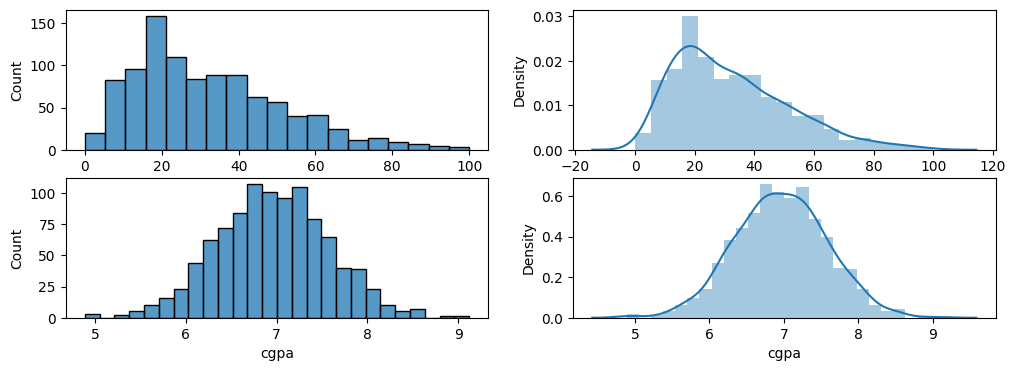

In [ ]:

fig, axs=plt.subplots(2,2,figsize=(12,4))
ax1,ax2,ax3,ax4=axs.ravel()

sns.histplot(df['placement_exam_marks'],ax=ax1)
sns.distplot(df['placement_exam_marks'],ax=ax2)
sns.histplot(df['cgpa'],ax=ax3)
sns.distplot(df['cgpa'],ax=ax4)


In [ ]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


# IQR(Inter Quantile Range Method)

In [ ]:
q1=df['placement_exam_marks'].quantile(0.25)
q3=df['placement_exam_marks'].quantile(0.75)

In [ ]:
iqr=q3-q1


In [ ]:
minimumlimit=q1-1.5*iqr
maximumlimit=q3+1.5*iqr
maximumlimit

(1000, 3)

In [ ]:
df['placement_exam_marks'].max()

100.0

<Axes: ylabel='placement_exam_marks'>

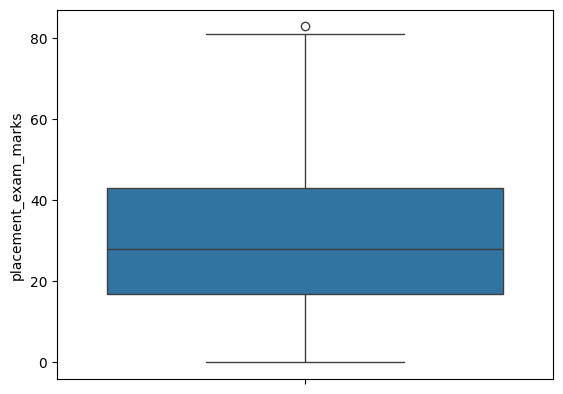

In [ ]:
new_df=df[(df['placement_exam_marks']<maximumlimit) & (df['placement_exam_marks']>minimumlimit)]
sns.boxplot(new_df['placement_exam_marks'])

Text(0.5, 1.0, 'After Trimming')

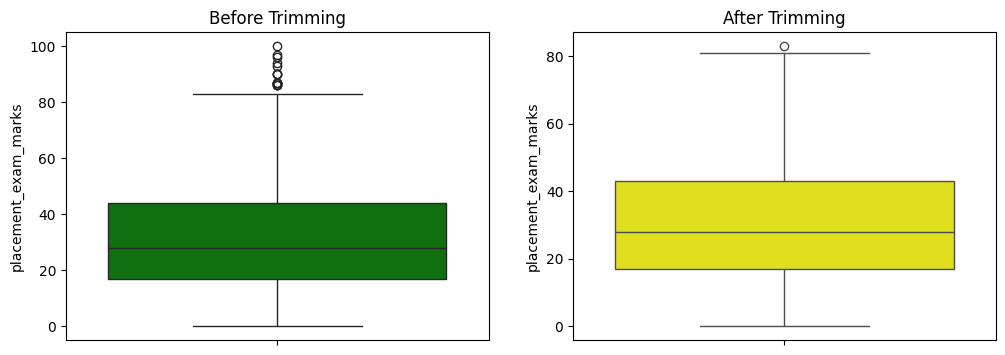

In [ ]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
sns.boxplot(df['placement_exam_marks'],orient='Horizontal',ax=ax1,color='green')
ax1.set_title('Before Trimming')

sns.boxplot(new_df['placement_exam_marks'],orient='Horizontal',ax=ax2,color='yellow')
ax2.set_title("After Trimming")

# Capping

In [ ]:
new_data=df.copy()
new_data['placed_marks']=np.where(new_data['placement_exam_marks']>maximumlimit,maximumlimit,
                                  np.where(new_data['placement_exam_marks']<minimumlimit, minimumlimit, new_data['placement_exam_marks']))
new_data

,cgpa,placement_exam_marks,placed,placed_marks
0,7.19,26.0,1,26.0
1,7.46,38.0,1,38.0
2,7.54,40.0,1,40.0
3,6.42,8.0,1,8.0
4,7.23,17.0,0,17.0
...,...,...,...,...
995,8.87,44.0,1,44.0
996,9.12,65.0,1,65.0
997,4.89,34.0,0,34.0
998,8.62,46.0,1,46.0


<Axes: ylabel='placed_marks'>

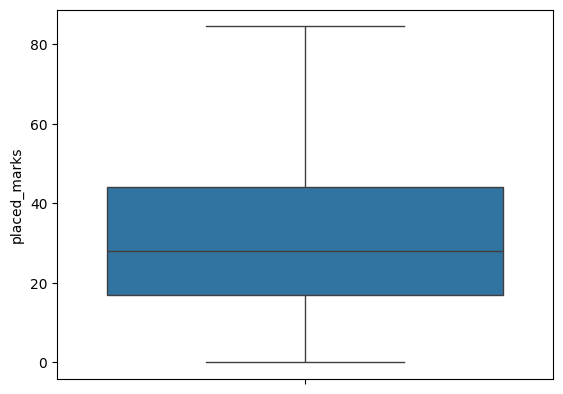

In [ ]:
sns.boxplot(new_data['placed_marks'])